<a href="https://colab.research.google.com/github/chintusathvik/LGM-VIP/blob/main/iris%20flower%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IRIS FLOWER CLASSIFICATION ML PROJECT**

*In this article of Iris Flowers Classification, we will be dealing with Logistic Regression Machine Learning Algorithm. First, we will see logistic Regression, and then we will understand the working of an algorithm with the Iris flowers dataset. We all know about Iris Dataset, and it contains features of different flower species. Independent features in this dataset are Sepal Length, Sepal Width, Petal Length, and Petal Width. All these lengths were in centimeters. And Dependent feature, which will be the output for the model, is Species. It contains the name of the species to which that particular flower with those measurements belongs.*


**Exploring the dataset and **

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns

iris = datasets.load_iris() #Loading the dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**Converting the dataset to pandas dataframe**

In [ ]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

*to see the first few rows of our data frame.*

In [ ]:
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


*to access the different classes using their names instead of numbers*

In [ ]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species


In [ ]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

*to get some simple statistical information about the dataset*

In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Plotting the dataset**

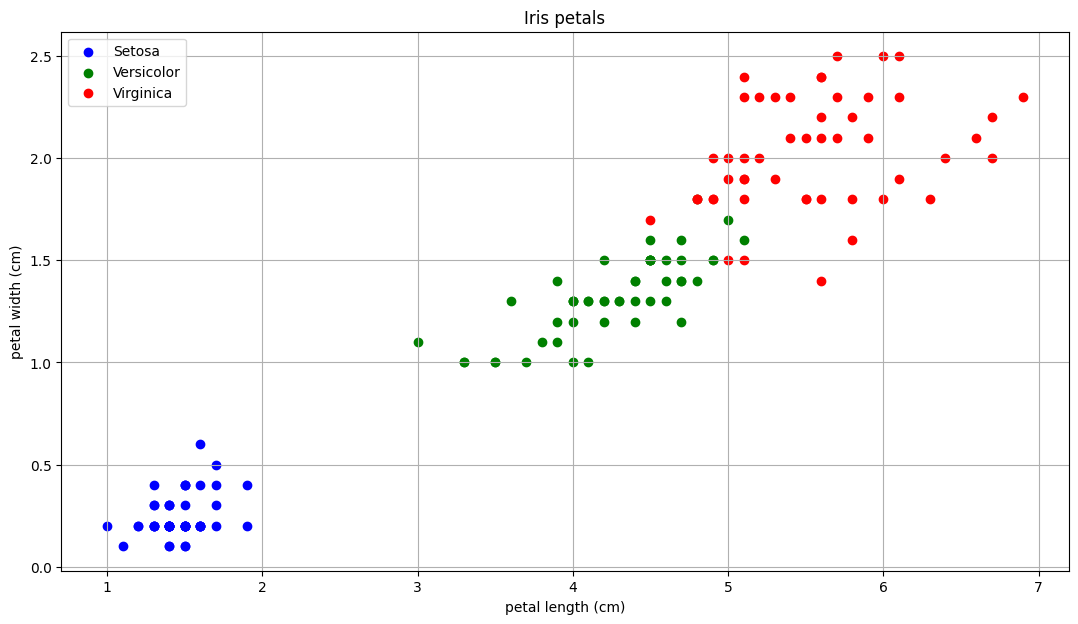

In [ ]:
import matplotlib.pyplot as plt

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

Text(0, 0.5, 'species')

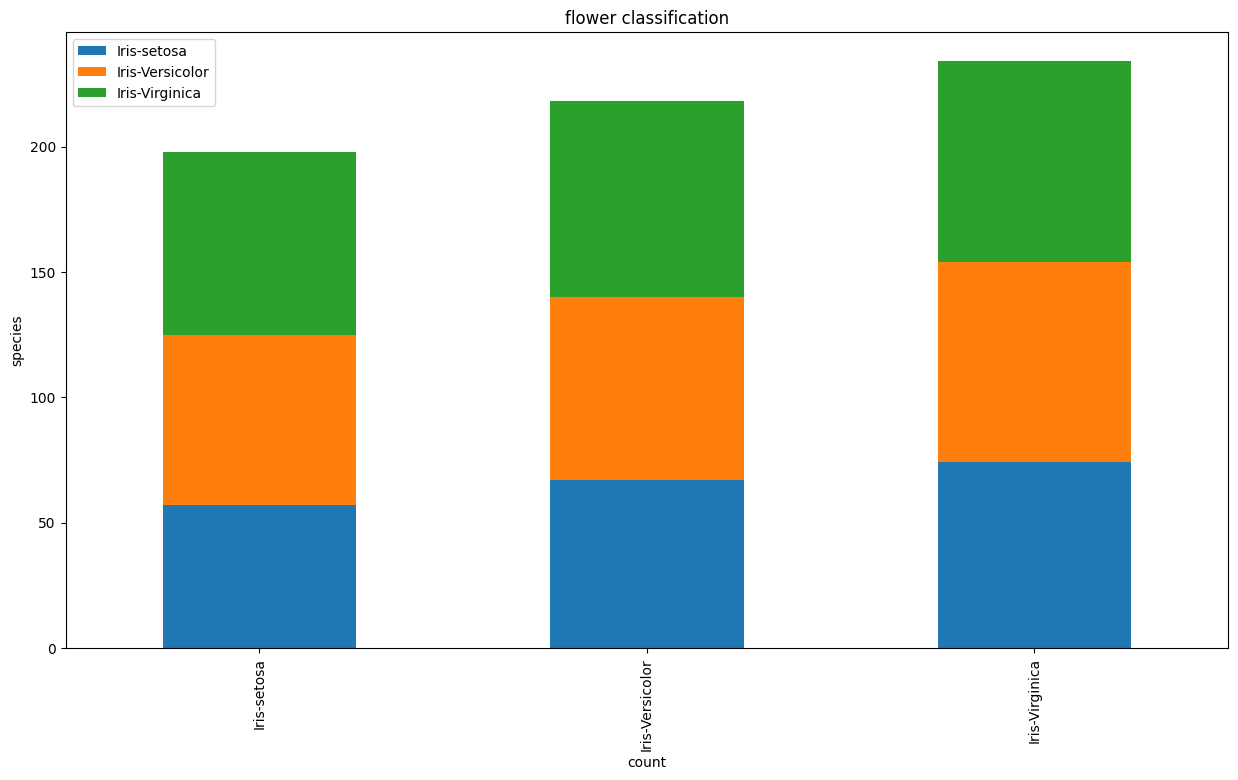

In [ ]:
import pandas as pd
plotdata = pd.DataFrame({
    "Iris-setosa":[57,67,74],
    "Iris-Versicolor":[68,73,80],
    "Iris-Virginica":[73,78,80]},
    index=["Iris-setosa", "Iris-Versicolor", "Iris-Virginica"])
plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title("flower classification")

plt.xlabel("count")

plt.ylabel("species")

**Performing classification**

In [ ]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
X = iris.drop(['target','species'], axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

*using logistic model - import and train it*

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

**Training predictions**

In [ ]:
training_prediction = log_reg.predict(X_train)
training_prediction

array([1., 2., 1., 0., 1., 2., 0., 0., 1., 2., 0., 2., 0., 0., 2., 1., 2.,
       2., 2., 2., 1., 0., 0., 1., 2., 0., 0., 0., 1., 2., 0., 2., 2., 0.,
       1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0., 1., 1., 0., 1.,
       2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 2., 2., 1., 2., 1., 1., 2.,
       2., 0., 1., 1., 0., 1., 2.])

**Test predictions**

In [ ]:
test_prediction = log_reg.predict(X_test)
test_prediction

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2., 2., 1., 2., 1.,
       2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 2.,
       0., 1., 2., 0., 2., 2., 1.])

**Performance in training**

In [ ]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        21
         1.0      0.923     0.889     0.906        27
         2.0      0.893     0.926     0.909        27

    accuracy                          0.933        75
   macro avg      0.939     0.938     0.938        75
weighted avg      0.934     0.933     0.933        75

[[21  0  0]
 [ 0 24  3]
 [ 0  2 25]]


In [ ]:
Accuracy is 93.3%

**Performance in testing**

In [ ]:
print("Precision, Recall, Confusion matrix, in testing\n")

# Precision Recall scores
print(metrics.classification_report(y_test, test_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_test, test_prediction))

Precision, Recall, Confusion matrix, in testing

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      1.000     1.000     1.000        23
         2.0      1.000     1.000     1.000        23

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000     1.000        75

[[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]


**Conclusion on Classification**

Flower classification is a very important, simple, and basic project for any machine learning student. Every machine learning student should be thorough with the iris flowers dataset. This classification can be done by many classification algorithms in machine learning but in our article, we used logistic regression. Overall in this article, we have seen

Mainly we focused on Logistic Regression We took Iris Flowers dataset and performed a logistic regression algorithm Finally, it classified flowers into their species. And we got an accuracy of 93.33%, which shows that the model we built is very accurate.



